# Lista 07

In [268]:
import matplotlib.cm
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import seaborn as sns
import sklearn.metrics
import sklearn.decomposition

## Zadanie 1.

### a)

In [2]:
MU = np.array([3, 5])
SIGMA = np.array([
    [12, 3],
    [3, 1],
])

In [3]:
X = np.random.multivariate_normal(MU, SIGMA, size=1_000)
X_orig = X.copy()
X

array([[ 0.23010541,  4.16783614],
       [ 5.20390207,  6.04655088],
       [10.13336593,  7.24394776],
       ...,
       [ 1.71542151,  5.16860618],
       [ 1.30845453,  5.1711925 ],
       [ 3.00755845,  4.84026951]])

### b)

In [4]:
np.mean(X[:, 0]), np.mean(X[:, 1])

(2.855089297768264, 5.001015654520705)

In [5]:
np.var(X[:, 0]), np.var(X[:, 1])

(12.389995857779454, 1.0403719595441847)

In [6]:
X[:, 0] -= np.mean(X[:, 0])
X[:, 1] -= np.mean(X[:, 1])

round(np.mean(X[:, 0])), round(np.mean(X[:, 1]))

(-0.0, -0.0)

In [7]:
X[:, 0] /= np.std(X[:, 0])
X[:, 1] /= np.std(X[:, 1])

round(np.std(X[:, 0])), round(np.std(X[:, 1]))

(1.0, 1.0)

In [8]:
X_after_normalization = X.copy()

### c)

In [9]:
X_cov = np.cov(X.T)
X_cov

array([[1.001001  , 0.87070189],
       [0.87070189, 1.001001  ]])

### d)

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(X_cov)
order = np.array(list(reversed(np.argsort(eigenvalues))))
print(order)
eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[order]
print(eigenvalues)
print(eigenvectors)

[1 0]
[1.8717029  0.13029911]
[[ 0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]


### e)

In [11]:
coeff1 = 1/np.sqrt(eigenvalues[0])
coeff2 = 1/np.sqrt(eigenvalues[1])

coeff1, coeff2

(0.7309396885940216, 2.770315817568116)

In [12]:
new_X_0 = coeff1 * eigenvectors[0] @ X.T
new_X_1 = coeff2 * eigenvectors[1] @ X.T

In [13]:
X = np.vstack((new_X_0, new_X_1)).T
X.shape

(1000, 2)

In [14]:
X

array([[ 0.03675206,  3.06099115],
       [-0.18490969, -3.31513159],
       [-0.06784036, -8.35809436],
       ...,
       [-0.25226594,  0.3123831 ],
       [-0.31333368,  0.53390018],
       [ 0.10384195,  0.22386526]])

### f)

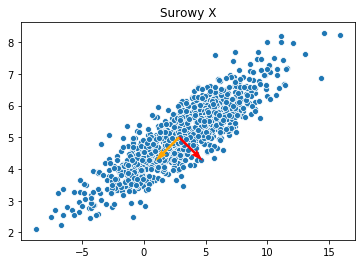

In [17]:
sns.scatterplot(X_orig[:, 0], X_orig[:, 1])
plt.quiver(
    X_orig[:, 0].mean(), X_orig[:, 1].mean(),
    eigenvectors[0][0], eigenvectors[0][1], color='red', scale=10)
plt.quiver(
    X_orig[:, 0].mean(), X_orig[:, 1].mean(),
    eigenvectors[1][0], eigenvectors[1][1], color='orange', scale=10)
plt.title('Surowy X')
plt.show()

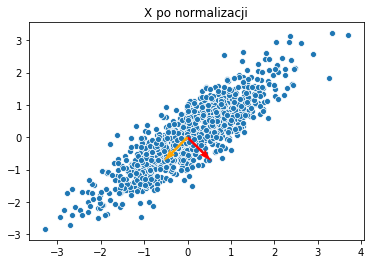

In [18]:
sns.scatterplot(X_after_normalization[:, 0], X_after_normalization[:, 1])
plt.quiver(
    X_after_normalization[:, 0].mean(), X_after_normalization[:, 1].mean(),
    eigenvectors[0][0], eigenvectors[0][1], color='red', scale=10)
plt.quiver(
    X_after_normalization[:, 0].mean(), X_after_normalization[:, 1].mean(),
    eigenvectors[1][0], eigenvectors[1][1], color='orange', scale=10)
plt.title('X po normalizacji')
plt.show()

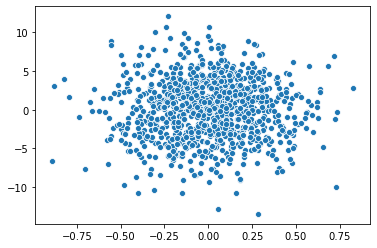

In [19]:
sns.scatterplot(X[:, 0], X[:, 1])

### g)

## Zadanie 2.

In [76]:
faces = scipy.io.loadmat(
    'ReducedImagesForTraining.mat', matlab_compatible=True)['images']

In [77]:
faces.shape

(4920, 250)

In [153]:
faces

array([[ 34.16666667, 230.        ,  34.08333333, ...,  36.41666667,
         49.75      ,  73.41666667],
       [ 31.5       ,  53.25      ,  29.91666667, ...,  40.66666667,
         35.58333333,  42.58333333],
       [ 31.75      ,  38.33333333,  30.5       , ...,  38.75      ,
         37.25      ,  41.41666667],
       ...,
       [249.08333333, 244.25      , 245.41666667, ...,  34.91666667,
         22.08333333, 216.08333333],
       [244.91666667, 244.83333333, 244.66666667, ...,  31.        ,
         21.33333333,  59.16666667],
       [243.75      , 244.58333333, 245.        , ...,  28.        ,
         21.75      ,  57.91666667]])

In [292]:
def display_faces(matrix, rows=60, cols=82, vertically=10, horizontally=25):
    image = np.zeros((rows * horizontally, cols * vertically))
    face_idx = 0
    for i in range(vertically):
        for j in range(horizontally):
            image[rows*j:rows*j+rows, cols*i:cols*i+cols] = matrix[:, face_idx].reshape(rows, cols)
            face_idx += 1

    plt.figure(figsize=(60, 60))
    plt.imshow(image.T)

In [225]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in range(X.shape[0]):
        plt.text(
            X[i, 0], X[i, 1], str(y[i]),
            color=plt.cm.tab20(0.02*y[i]),
            fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

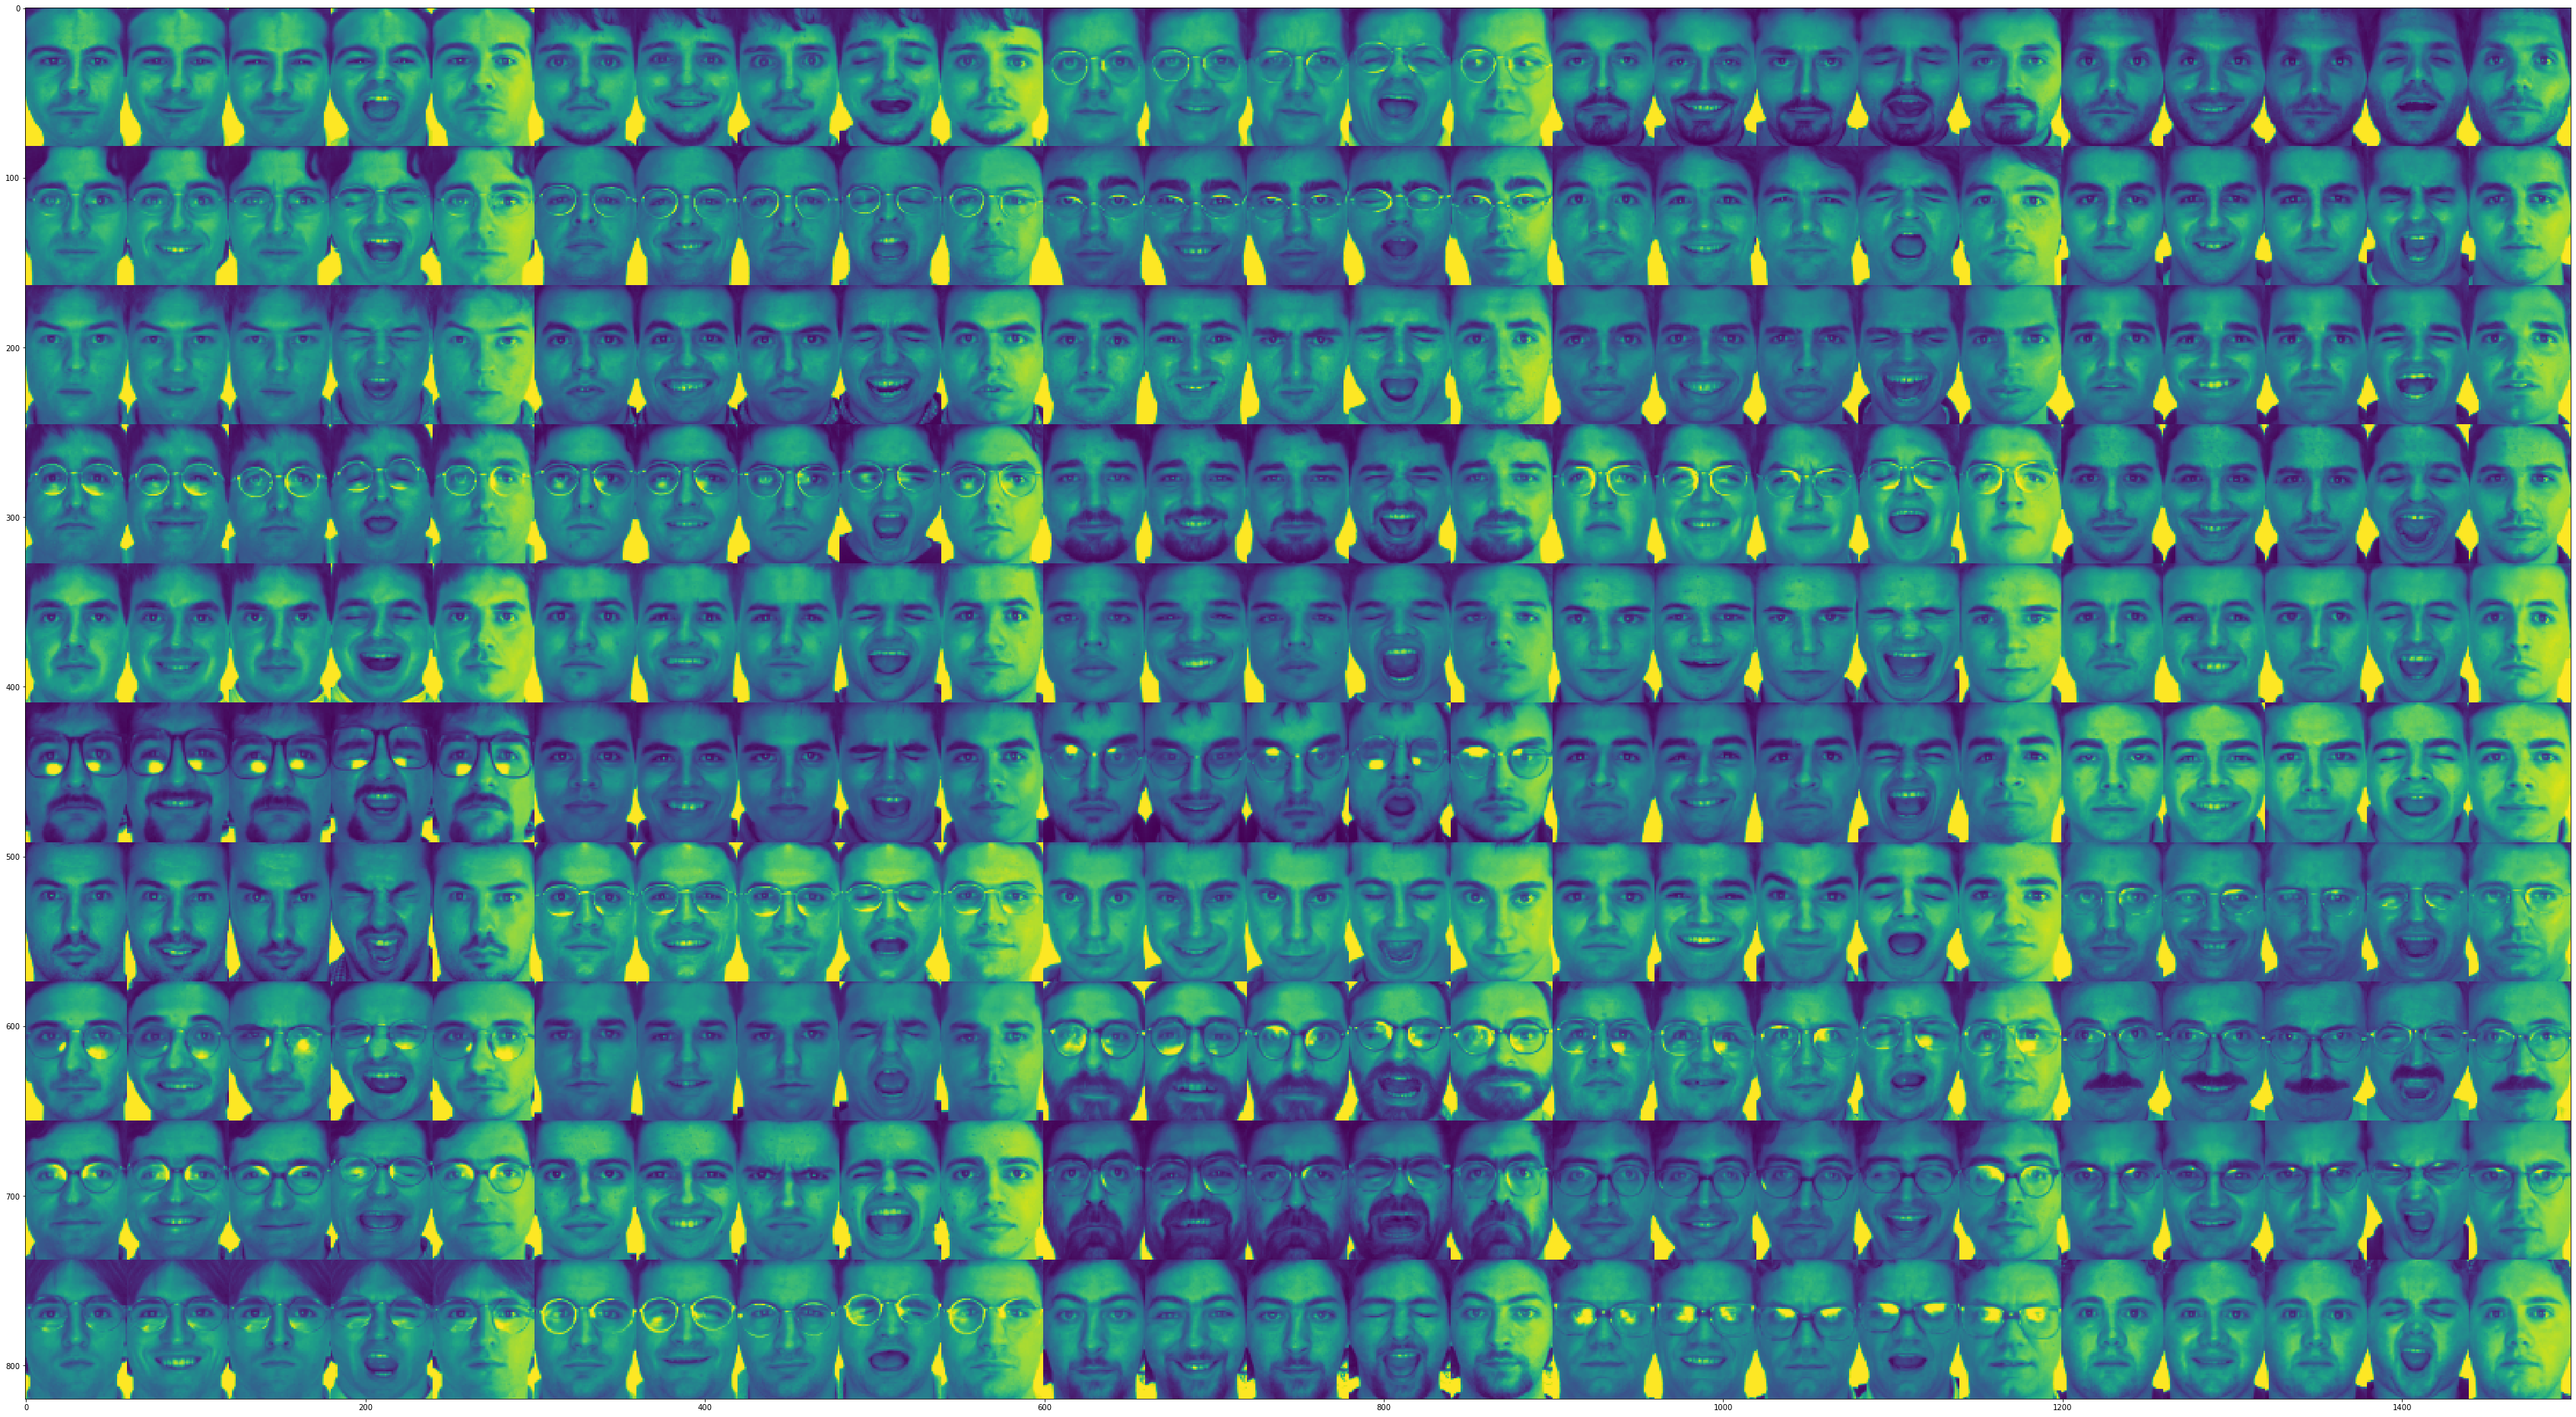

In [198]:
display_faces(faces)

### Standardowa PCA

In [201]:
faces_pca = sklearn.decomposition.PCA(
    n_components=2, whiten=True, svd_solver='randomized').fit_transform(faces.T)
faces_pca

array([[ 4.59884212e-01, -5.22976735e-01],
       [ 4.12606815e-01, -4.42371939e-01],
       [ 3.90114685e-01, -2.59555665e-01],
       [ 2.13351580e-01, -2.24505430e-01],
       [ 2.15974025e+00, -7.04060818e-01],
       [-8.72524743e-02, -1.04986859e+00],
       [-2.89248164e-01, -5.11304328e-01],
       [-9.98939809e-02,  2.58073023e-02],
       [-2.53768855e-01,  9.09510429e-03],
       [ 1.67126910e+00, -6.56336292e-01],
       [ 3.53149650e-01, -3.02649489e-02],
       [ 1.50161529e-01, -7.10130587e-02],
       [ 2.73734572e-01,  1.47628414e-01],
       [-3.06188133e-02, -3.99987200e-02],
       [ 2.17642297e+00,  4.55556518e-01],
       [-8.29110975e-01,  2.19176382e-01],
       [-1.00085100e+00,  7.38636496e-01],
       [-1.11454109e+00,  1.18629783e+00],
       [-1.29594378e+00,  6.53692865e-01],
       [ 6.82997654e-01,  6.79928847e-01],
       [-1.01302000e+00, -1.58589142e+00],
       [-1.38991527e+00, -2.43069228e-01],
       [-1.49824515e+00, -1.28287473e+00],
       [-1.

In [202]:
faces_pca.shape

(250, 2)

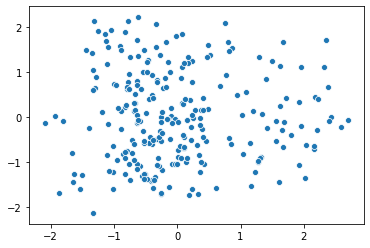

In [203]:
sns.scatterplot(faces_pca[:, 0], faces_pca[:, 1])

In [227]:
faces_classes = np.zeros(250, dtype=int)
for person_id in range(50):
    faces_classes[person_id*5:person_id*5+5] = 1 + person_id
faces_classes

array([ 1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
       18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21,
       21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24,
       24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28,
       28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31,
       31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34,
       35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38,
       38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41,
       41, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 44, 44, 44, 44, 44, 45,
       45, 45, 45, 45, 46

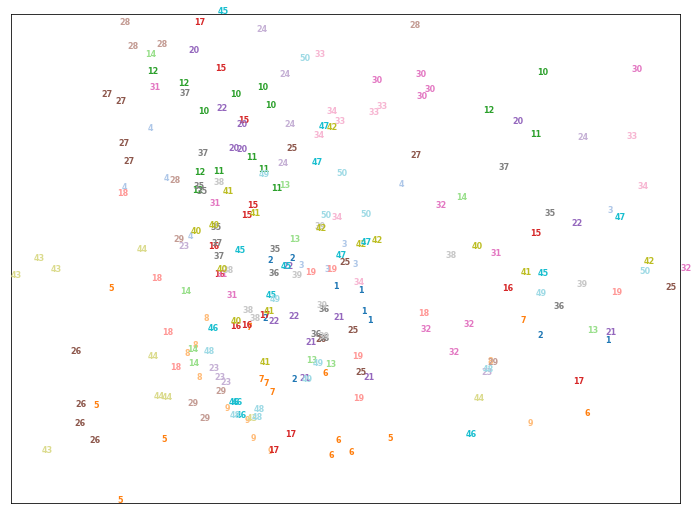

In [232]:
plot_digits(faces_pca, faces_classes)

### Kernelizowana PCA

#### Gauss Kernel

In [266]:
faces_kernel_pca_rbf = sklearn.decomposition.KernelPCA(
    n_components=2, kernel='rbf', gamma=5).fit_transform(faces.T)

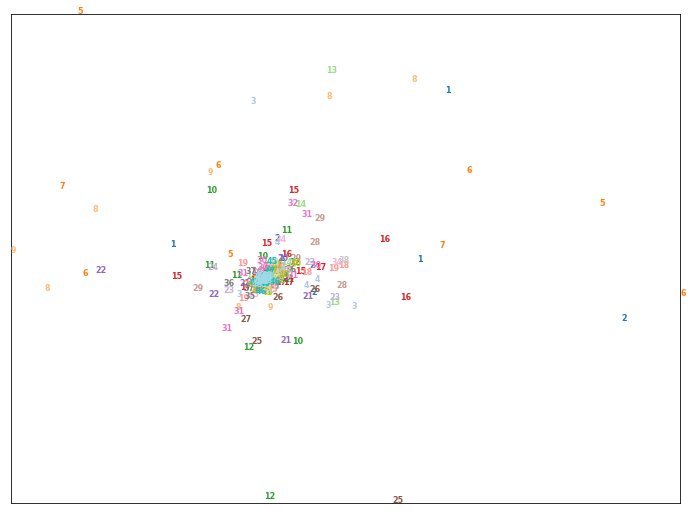

In [267]:
plot_digits(faces_kernel_pca_rbf, faces_classes)

#### Polynomial Kernel

In [246]:
faces_kernel_pca_poly = sklearn.decomposition.KernelPCA(
    n_components=2, kernel='poly', degree=2).fit_transform(faces.T)

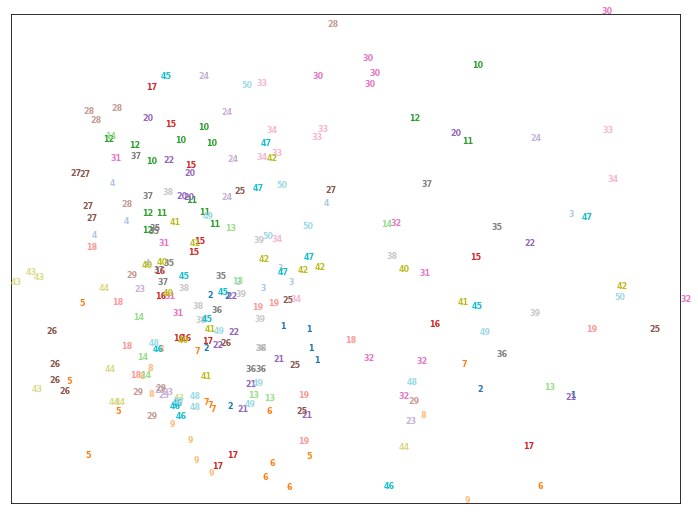

In [247]:
plot_digits(faces_kernel_pca_poly, faces_classes)

## Zadanie 3. i 4.

In [410]:
def predict(matrix, classes, new_vec, max_min_dist):
    distances = sklearn.metrics.pairwise.euclidean_distances([new_vec], matrix.T)
    closest_neighbor = np.argmin(distances)
    return classes[closest_neighbor] if distances[0, closest_neighbor] <= max_min_dist else -42
    
predict(faces, faces_classes, faces[:, 247], 1)

50

In [287]:
faces_test_set = scipy.io.loadmat(
    'ReducedImagesForTesting.mat', matlab_compatible=True)['images']

In [288]:
faces_test_set.shape

(4920, 100)

In [290]:
faces_test_set

array([[236.16666667, 249.91666667,  41.16666667, ...,  74.33333333,
         86.16666667,  90.08333333],
       [248.16666667, 214.83333333,  42.5       , ...,  60.        ,
         85.33333333,  95.91666667],
       [142.91666667,  99.16666667,  44.25      , ...,  80.91666667,
         97.75      ,  77.5       ],
       ...,
       [254.33333333, 242.66666667, 255.        , ..., 203.33333333,
         43.83333333,  65.        ],
       [248.58333333, 234.25      , 255.        , ..., 247.5       ,
         43.91666667,  58.16666667],
       [242.91666667, 223.08333333, 232.        , ..., 254.08333333,
         38.83333333,  57.41666667]])

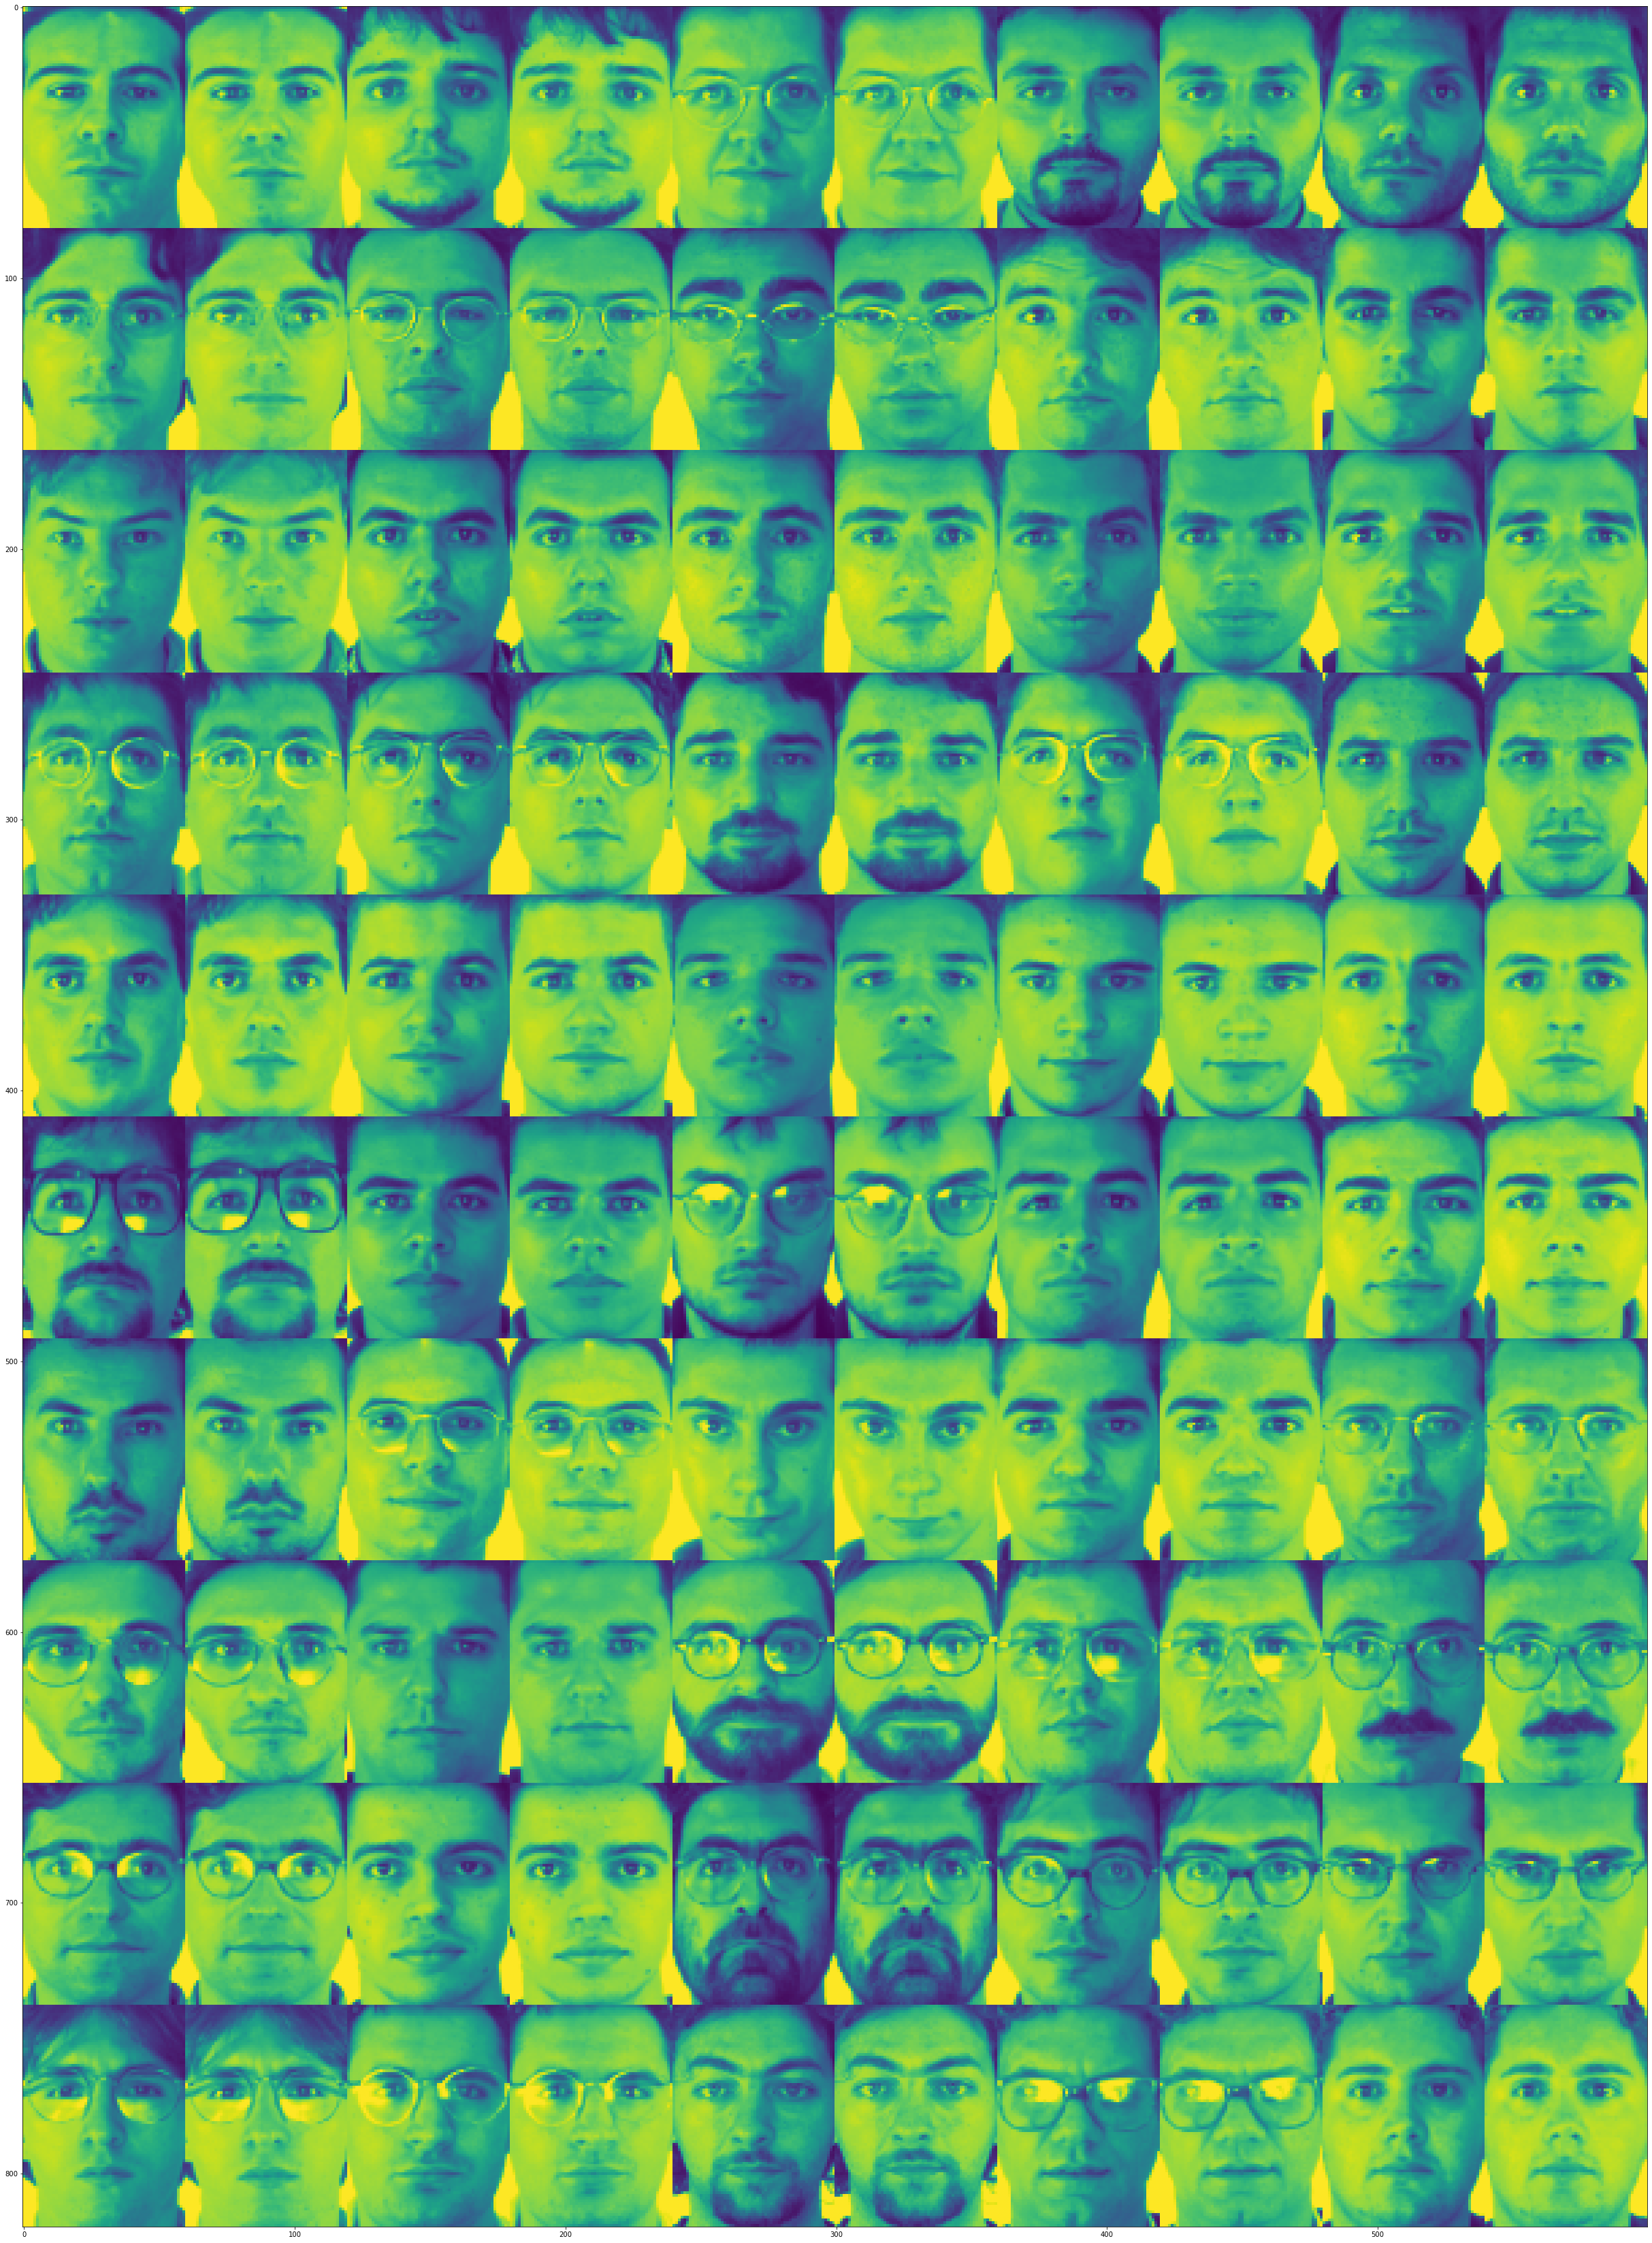

In [294]:
display_faces(faces_test_set, horizontally=10, vertically=10)

In [372]:
predictions = [
    predict(faces, faces_classes, faces_test_set[:, idx], 4000.)
    for idx in range(100)
]

predictions

[32,
 32,
 -42,
 2,
 32,
 32,
 25,
 35,
 39,
 32,
 -42,
 6,
 32,
 32,
 13,
 13,
 -42,
 -42,
 30,
 30,
 -42,
 30,
 33,
 33,
 -42,
 32,
 25,
 33,
 33,
 33,
 19,
 19,
 32,
 32,
 25,
 2,
 19,
 19,
 33,
 32,
 32,
 32,
 -42,
 32,
 1,
 1,
 33,
 33,
 -42,
 32,
 -42,
 -42,
 33,
 33,
 -42,
 -42,
 25,
 13,
 30,
 30,
 33,
 33,
 32,
 32,
 33,
 33,
 30,
 32,
 33,
 33,
 32,
 32,
 33,
 33,
 -42,
 38,
 32,
 32,
 1,
 33,
 30,
 47,
 -42,
 32,
 22,
 22,
 19,
 13,
 32,
 33,
 -42,
 -42,
 47,
 32,
 50,
 48,
 -42,
 32,
 32,
 32]

In [337]:
perfect_answer = sum([(i, i) for i in range(1, 51)], ())

perfect_answer

(1,
 1,
 2,
 2,
 3,
 3,
 4,
 4,
 5,
 5,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 11,
 11,
 12,
 12,
 13,
 13,
 14,
 14,
 15,
 15,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 19,
 20,
 20,
 21,
 21,
 22,
 22,
 23,
 23,
 24,
 24,
 25,
 25,
 26,
 26,
 27,
 27,
 28,
 28,
 29,
 29,
 30,
 30,
 31,
 31,
 32,
 32,
 33,
 33,
 34,
 34,
 35,
 35,
 36,
 36,
 37,
 37,
 38,
 38,
 39,
 39,
 40,
 40,
 41,
 41,
 42,
 42,
 43,
 43,
 44,
 44,
 45,
 45,
 46,
 46,
 47,
 47,
 48,
 48,
 49,
 49,
 50,
 50)

In [338]:
accuracy = np.array(predictions) == np.array(perfect_answer)
sum(accuracy) / 100

0.13

In [409]:
accuracy = np.array(predictions) == -42
sum(accuracy) / 100

0.17

In [355]:
different_pca_dims = {}

for dim in range(250, 0, -1):
    func_normalized = sklearn.decomposition.PCA(
        n_components=dim, whiten=True)
    func_non_normalized = sklearn.decomposition.PCA(
        n_components=dim, whiten=False)
    
    normalized = func_normalized.fit_transform(faces.T)
    non_normalized = func_non_normalized.fit_transform(faces.T)
    
    different_pca_dims[dim] = {
        'func_normalized': func_normalized,
        'func_non_normalized': func_non_normalized,
        'normalized': normalized,
        'non_normalized': non_normalized,
    }

In [386]:
different_pca_dims[42]['normalized'].shape

(250, 42)

In [408]:
predict(different_pca_dims[230]['normalized'].T, faces_classes, [0]*230, np.inf)

11

In [405]:
best_accuracy = {'value': -42, 'dim': -42, 'normalization': False}

for dim in range(250, 0, -1):
    print(f'exploring dimension = {dim}')
    
    mapped_test_vecs_normalized = \
        different_pca_dims[dim]['func_normalized'].transform(faces_test_set.T)
    mapped_test_vecs_non_normalized = \
        different_pca_dims[dim]['func_non_normalized'].transform(faces_test_set.T)
    
    predictions_normalized = [
        predict(
            different_pca_dims[dim]['normalized'].T,
            faces_classes,
            mapped_test_vecs_normalized[idx, :],
            np.inf)
        for idx in range(100)
    ]
    
    predictions_non_normalized = [
        predict(
            different_pca_dims[dim]['non_normalized'].T,
            faces_classes,
            mapped_test_vecs_non_normalized[idx, :],
            np.inf)
        for idx in range(100)
    ]
    
    normalized_accuracy = np.array(predictions_normalized) == np.array(perfect_answer)
    non_normalized_accuracy = np.array(predictions_non_normalized) == np.array(perfect_answer)
    normalized_accuracy = sum(normalized_accuracy) / 100
    non_normalized_accuracy = sum(non_normalized_accuracy) / 100
    
    print(f'normalized accuracy = {normalized_accuracy}')
    print(f'non-normalized accuracy = {non_normalized_accuracy}')
    
    if best_accuracy['value'] < normalized_accuracy:
        best_accuracy = {'value': normalized_accuracy, 'dim': dim, 'normalization': True}
    elif best_accuracy['value'] < non_normalized_accuracy:
        best_accuracy = {'value': non_normalized_accuracy, 'dim': dim, 'normalization': False}

exploring dimension = 250
normalized accuracy = 0.02
non-normalized accuracy = 0.17
exploring dimension = 249
normalized accuracy = 0.83
non-normalized accuracy = 0.17
exploring dimension = 248
normalized accuracy = 0.85
non-normalized accuracy = 0.17
exploring dimension = 247
normalized accuracy = 0.82
non-normalized accuracy = 0.17
exploring dimension = 246
normalized accuracy = 0.83
non-normalized accuracy = 0.17
exploring dimension = 245
normalized accuracy = 0.84
non-normalized accuracy = 0.17
exploring dimension = 244
normalized accuracy = 0.84
non-normalized accuracy = 0.17
exploring dimension = 243
normalized accuracy = 0.84
non-normalized accuracy = 0.17
exploring dimension = 242
normalized accuracy = 0.84
non-normalized accuracy = 0.17
exploring dimension = 241
normalized accuracy = 0.81
non-normalized accuracy = 0.17
exploring dimension = 240
normalized accuracy = 0.83
non-normalized accuracy = 0.17
exploring dimension = 239
normalized accuracy = 0.81
non-normalized accuracy

normalized accuracy = 0.86
non-normalized accuracy = 0.15
exploring dimension = 150
normalized accuracy = 0.86
non-normalized accuracy = 0.15
exploring dimension = 149
normalized accuracy = 0.91
non-normalized accuracy = 0.15
exploring dimension = 148
normalized accuracy = 0.87
non-normalized accuracy = 0.15
exploring dimension = 147
normalized accuracy = 0.91
non-normalized accuracy = 0.15
exploring dimension = 146
normalized accuracy = 0.86
non-normalized accuracy = 0.15
exploring dimension = 145
normalized accuracy = 0.88
non-normalized accuracy = 0.15
exploring dimension = 144
normalized accuracy = 0.88
non-normalized accuracy = 0.15
exploring dimension = 143
normalized accuracy = 0.9
non-normalized accuracy = 0.15
exploring dimension = 142
normalized accuracy = 0.9
non-normalized accuracy = 0.15
exploring dimension = 141
normalized accuracy = 0.9
non-normalized accuracy = 0.15
exploring dimension = 140
normalized accuracy = 0.88
non-normalized accuracy = 0.15
exploring dimension =

normalized accuracy = 0.8
non-normalized accuracy = 0.13
exploring dimension = 50
normalized accuracy = 0.8
non-normalized accuracy = 0.13
exploring dimension = 49
normalized accuracy = 0.82
non-normalized accuracy = 0.13
exploring dimension = 48
normalized accuracy = 0.77
non-normalized accuracy = 0.13
exploring dimension = 47
normalized accuracy = 0.8
non-normalized accuracy = 0.13
exploring dimension = 46
normalized accuracy = 0.77
non-normalized accuracy = 0.13
exploring dimension = 45
normalized accuracy = 0.74
non-normalized accuracy = 0.13
exploring dimension = 44
normalized accuracy = 0.77
non-normalized accuracy = 0.13
exploring dimension = 43
normalized accuracy = 0.7
non-normalized accuracy = 0.13
exploring dimension = 42
normalized accuracy = 0.69
non-normalized accuracy = 0.13
exploring dimension = 41
normalized accuracy = 0.7
non-normalized accuracy = 0.13
exploring dimension = 40
normalized accuracy = 0.68
non-normalized accuracy = 0.14
exploring dimension = 39
normalize

In [406]:
best_accuracy

{'value': 0.97, 'dim': 104, 'normalization': True}

## Zadanie 5.